# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [27]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [28]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Import Data

In [29]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

In [30]:
sfo_data

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
2010,Central Sunset,418.172493,372560,1239
2010,Corona Heights,369.359338,372560,1239
2010,Cow Hollow,569.379968,372560,1239
2010,Croker Amazon,165.645730,372560,1239


In [31]:
df_neighborhood_locations 

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050
5,Buena Vista Park,37.768160,-122.439330
6,Central Richmond,37.777890,-122.445170
7,Central Sunset,37.749610,-122.489990
8,Clarendon Heights,37.753310,-122.447030
9,Corona Heights,37.785530,-122.456000


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [32]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    housing_units_year1_df = sfo_data['housing_units']
    housing_units_year1_df = housing_units_year1_df.groupby([sfo_data.index]).mean()
    
    housing_units_figplot = plt.figure()
    housing_units_plotted_df =  housing_units_year1_df.plot.bar(x='year', ylim=[360000, 390000], title="Number of Housing Units Sold Per Year On Average from 2010-2016 ")
    plt.close(housing_units_figplot)
    
    return pn.pane.Matplotlib(housing_units_figplot)

Matplotlib(Figure)
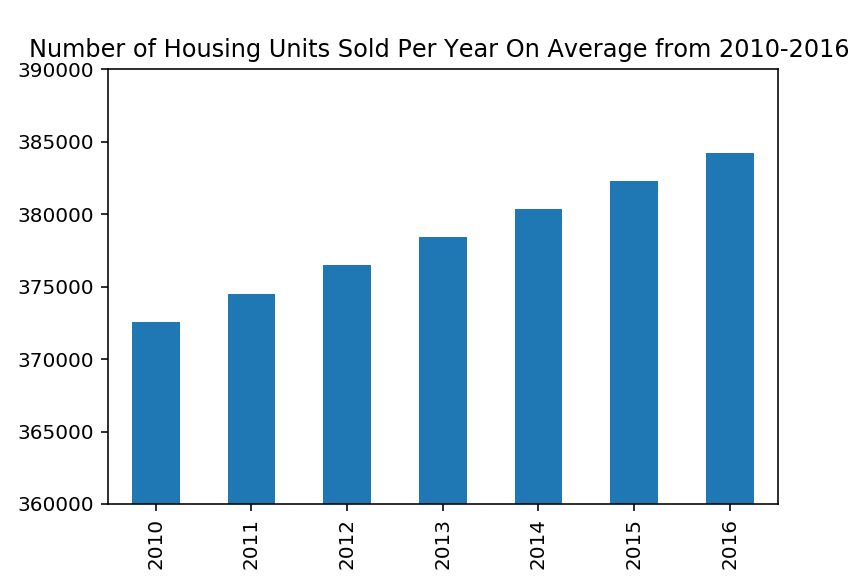

In [33]:
 housing_units_per_year() 

In [34]:
def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    sf_average = sfo_data.groupby("year").mean()
    sf_average.reset_index(inplace=True)

    sf_average_fig = px.line(
    sf_average,
    x="year",
    y="gross_rent",
    labels={"year":"Year","gross_rent":"Gross Rent"},
    title="San Francisco's Avereage Gross Rent",
    width=700, 
    height=600
    )
    return sf_average_fig

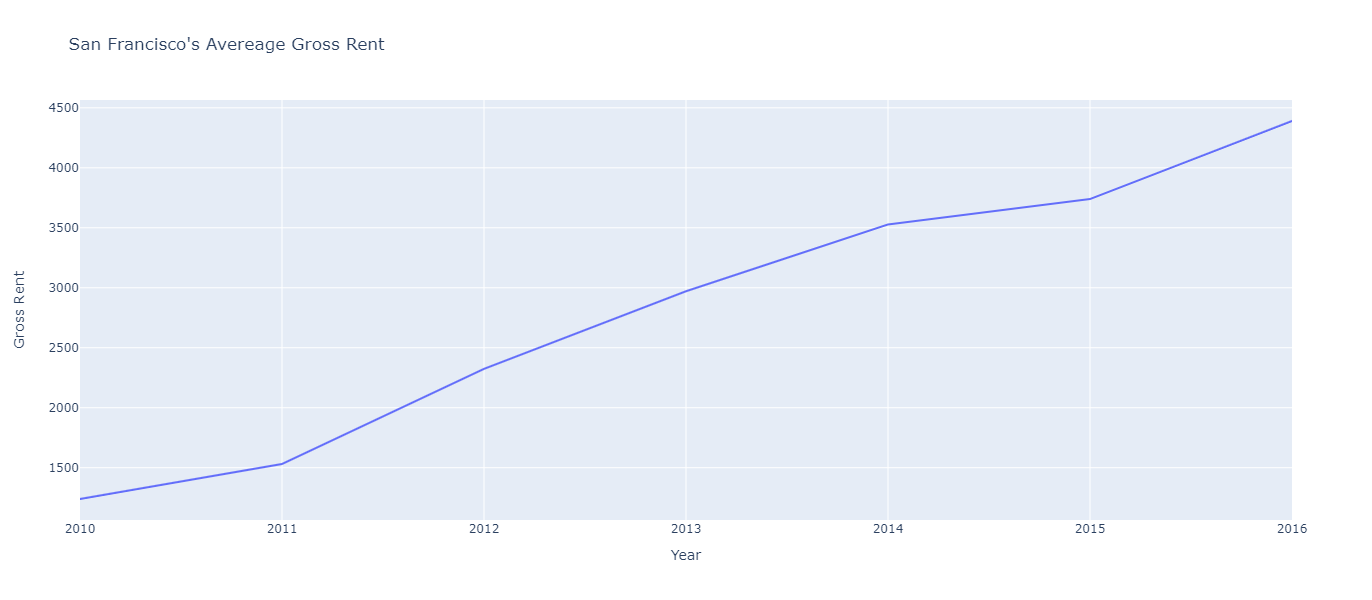

In [35]:
average_gross_rent()

In [36]:
def average_sales_price():
    """Average Sales Price Per Year."""
    
    average_price_df = pd.DataFrame(sfo_data.groupby(['year']).mean()['sale_price_sqr_foot'])
    
    average_sales_plot = average_price_df.hvplot(figsize=(20, 10),title='Average Sales Price per Year In San Francisco')
    
    return average_sales_plot

In [37]:
average_sales_price()

:Curve   [year]   (sale_price_sqr_foot)

In [38]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    sf_avg_neighborhood = sfo_data.groupby(["year","neighborhood"]).mean()
    sf_avg_neighborhood.reset_index(inplace=True)
    sf_avg_neighborhood_plot = sf_avg_neighborhood.hvplot.line(x='year',y='sale_price_sqr_foot', ylabel='sales price per square foot on average',groupby='neighborhood')
    return sf_avg_neighborhood_plot
    

In [39]:
average_price_by_neighborhood()

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [40]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    sf_expensive_neighborhoods = sfo_data.groupby('neighborhood').mean()
    sf_expensive_neighborhoods.sort_values(by = 'sale_price_sqr_foot', ascending=False, inplace=True)
    sf_expensive_neighborhoods.reset_index(inplace=True)
    sf_expensive_neighborhoods = sf_expensive_neighborhoods.head(10)
    sf_most_expensive_neighborhoods = sf_expensive_neighborhoods.hvplot.line(
        x='neighborhood', 
        y='sale_price_sqr_foot',
        rot=90, 
        height=400)
    return sf_most_expensive_neighborhoods
    

In [41]:
top_most_expensive_neighborhoods()

:Curve   [neighborhood]   (sale_price_sqr_foot)

In [42]:
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    sf_avg_neighborhoods = sfo_data.groupby('neighborhood').mean()
    sf_avg_neighborhoods.sort_values(by = 'sale_price_sqr_foot', ascending=False, inplace=True)
    sf_avg_neighborhoods.reset_index(inplace=True)  
    top_10_most_expensive = sf_avg_neighborhoods.head(10)
    top_10_parallel_plot = px.parallel_coordinates(
    top_10_most_expensive, 
    color='sale_price_sqr_foot')

    return top_10_parallel_plot

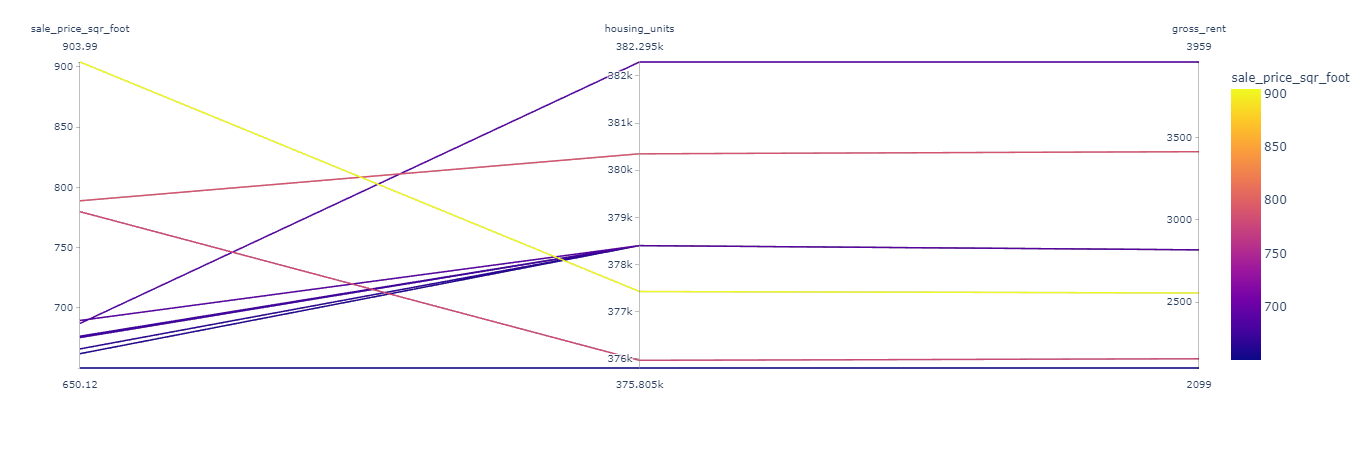

In [43]:
parallel_coordinates()

In [44]:
def parallel_categories():
    """Parallel Categories Plot."""
    most_expensive_neighborhood = sfo_data.groupby('neighborhood').mean()
    most_expensive_neighborhood.sort_values(by = 'sale_price_sqr_foot', ascending=False, inplace=True)
    most_expensive_neighborhood.reset_index(inplace=True)
    most_expensive_neighborhood = most_expensive_neighborhood.head(10)
    parallel_categories = px.parallel_categories(most_expensive_neighborhood.round(3), color="sale_price_sqr_foot", color_continuous_scale = px.colors.sequential.Inferno)
    return parallel_categories

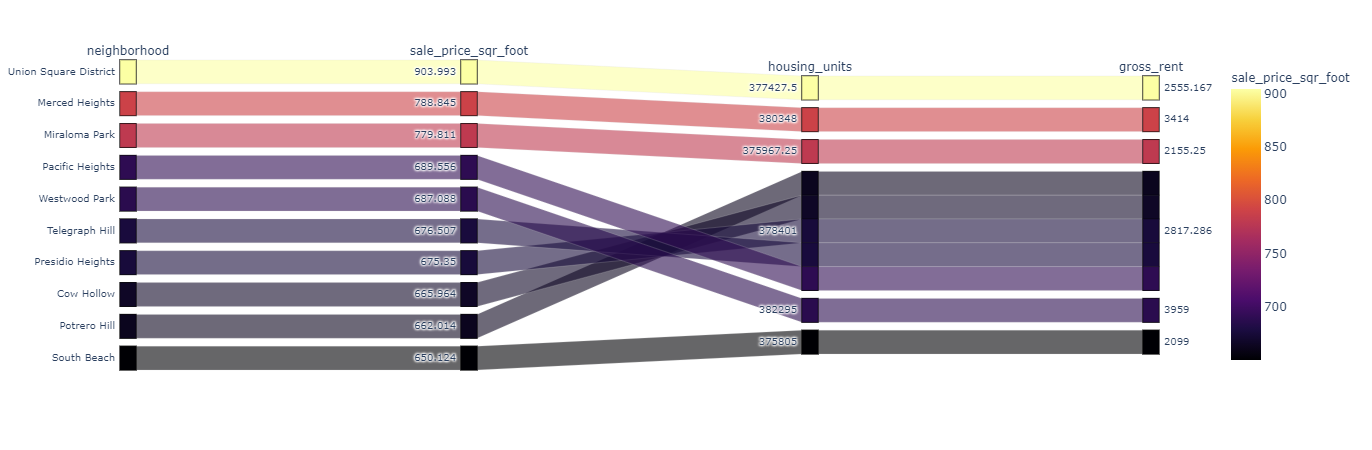

In [45]:
parallel_categories()

In [52]:
def neighborhood_map():
    """Neighborhood Map"""
    df_neighborhood_locations.rename(columns = {'Neighborhood':'neighborhood'}, inplace=True)
    neighborhood_mean = sfo_data.groupby('neighborhood').mean()
    neighborhood_mean.reset_index(inplace=True)
    neighborhood_location_df = pd.merge(df_neighborhood_locations,neighborhood_mean, on='neighborhood')
    plot_neighborhood = px.scatter_mapbox(neighborhood_location_df, lat='Lat', lon='Lon', color='gross_rent', size='housing_units', title='San Franciscos Gross Rent And Average Sales Price Per Square Foot' ,
    color_continuous_scale =px.colors.cyclical.IceFire, size_max=15, zoom=10)
    return plot_neighborhood.show()

In [53]:
neighborhood_map()

In [44]:
neighborhood_map()

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [54]:
plot_averages = pn.Column(
    'Price By Neighborhood and Average Gross Rent and Sales Price',
    average_price_by_neighborhood(),
    average_gross_rent(),
    average_sales_price()
)


map_plot = pn.Column(
    'Neighborhood Average Value',
    neighborhood_map()
)

parallel_plot = pn.Column(
    'Parallel Coordinates and Categories',
    parallel_categories(),
    parallel_coordinates(),
)


sf_housing_units = pn.Column(
    'Housing Units Sold per Year',
    housing_units_per_year()
)


most_expensive_plot = pn.Column(
    'Top Ten Most Expensive Neighborhoods',
    top_most_expensive_neighborhoods(),
)

sf_df = pn.Tabs(
    ('San Franciscos Housing Units Sold', sf_housing_units),
    ('Averages Neighborhood Costs', plot_averages),
    ('Most Expensive', most_expensive_plot),
    ('San Francisco Parallel Graphs', parallel_plot),
    ('Map', map_plot)
)
dashboard = pn.Column(
    pn.Row("Test Title"),
    sf_df, 
    width=900
)



## Serve the Panel Dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [2] Plotly(Figure)
        [3] HoloViews(Curve)
    [2] Column
        [0] Markdown(str)
        [1] HoloViews(Curve)
    [3] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Plotly(Figure)
    [4] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
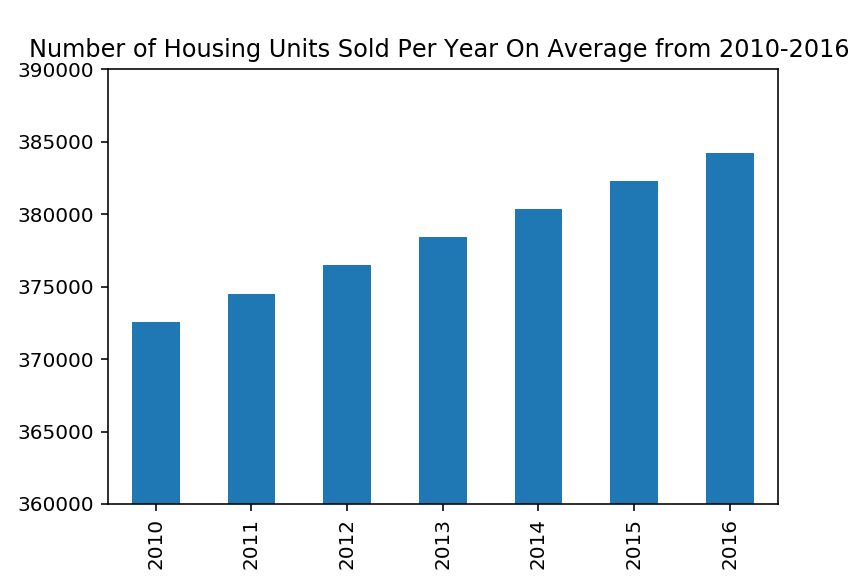

In [55]:
sf_df.servable()